In [1]:
import importlib

from AdalineGD import AdalineGD
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
X = data.data[0:100, [0, 2]]
y = data.target[0:100]
y = np.where(y == 0, -1, 1)

In [1]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(eta=0.01, n_iter=10).fit(X, y)
ax[0].plot(range(1, len(ada1.costs_) + 1),
           np.log10(ada1.costs_), marker='o')
ax[0].set_xlabel('Epoches')
ax[0].set_ylabel('log(sse)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(eta=0.0001, n_iter=10).fit(X, y)
ax[1].plot(range(1, len(ada2.costs_) + 1),
           ada2.costs_, marker='o')
ax[1].set_xlabel('Epoches')
ax[1].set_ylabel('(sse)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

NameError: name 'plt' is not defined

In [3]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolors='black')

## improving gradient descent through feature scaling

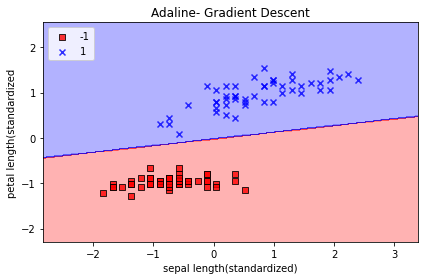

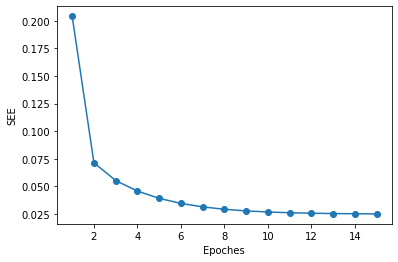

In [4]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title("Adaline- Gradient Descent")
plt.xlabel("sepal length(standardized)")
plt.ylabel("petal length(standardized")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.costs_) + 1), ada.costs_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('SEE')
plt.show()